## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

In [45]:
#Reading the Data using pandas dataframe
spam_email_data = pd.read_csv("spambase.data")
#Giving the column names
spam_email_data.columns = ['word_freq_make','word_freq_address','word_freq_all', 'word_freq_3d','word_freq_our','word_freq_over','word_freq_remove', 'word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_or_not_spam']

In [46]:
#Reading the first 5 tuples of the dataset
spam_email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [47]:
#check number of rows and columns in dataset
spam_email_data.shape

(4600, 58)

In [48]:
#checking for duplicates and dropping them
spam_email_data = spam_email_data.drop_duplicates()
display(spam_email_data)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [49]:
#Dropping the target column
X = spam_email_data.drop(columns=["spam_or_not_spam"])
display(X)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [50]:
#separate target values column
y = spam_email_data['spam_or_not_spam'].values

#view target values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
#Checking for null values
null_values = X.isnull().sum()
null_values

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# Scaling data

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

# Splitting Data

In [53]:
# Splitting the dataset into the Training set and Test set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2,random_state=0)

In [54]:
clf = DecisionTreeClassifier(random_state=0)
clf

DecisionTreeClassifier(random_state=0)

In [55]:
clf = clf.fit(X_train_scaled,y_train_scaled)

In [56]:
predTree = clf.predict(X_test_scaled)
predTree

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [57]:
predTree_train = clf.predict(X_train_scaled)
predTree_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [58]:
# Making the Confusion Matrix for the testing
cmTree = confusion_matrix(y_test_scaled, predTree)
print(pd.DataFrame(cmTree, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_test_scaled, y_pred = predTree))

          Not-spam  Spam
Not-spam       464    31
Spam            43   304
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       495
           1       0.91      0.88      0.89       347

    accuracy                           0.91       842
   macro avg       0.91      0.91      0.91       842
weighted avg       0.91      0.91      0.91       842



In [59]:
# Making the Confusion Matrix for the training
cmTree_train = confusion_matrix(y_train_scaled, predTree_train)
print(pd.DataFrame(cmTree_train, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train_scaled, y_pred = predTree_train))

          Not-spam  Spam
Not-spam      2036     0
Spam             0  1331
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2036
           1       1.00      1.00      1.00      1331

    accuracy                           1.00      3367
   macro avg       1.00      1.00      1.00      3367
weighted avg       1.00      1.00      1.00      3367



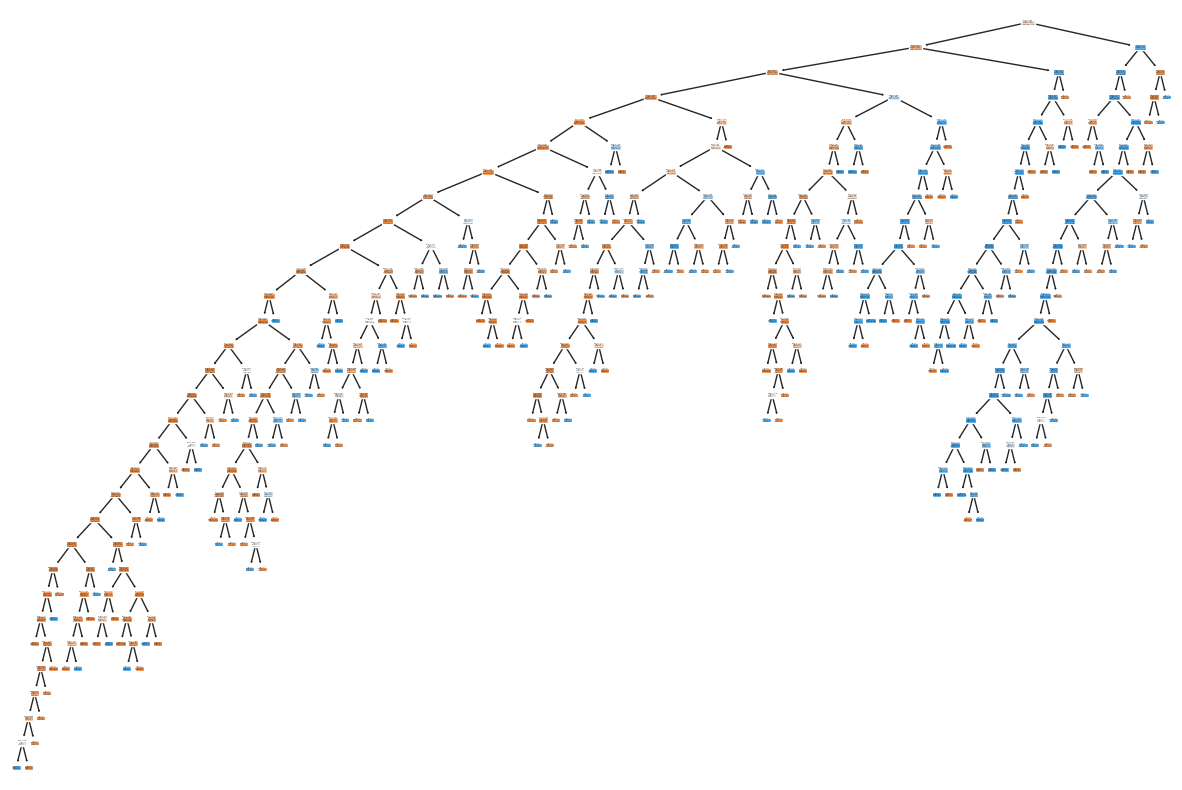

In [60]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

## Applying PCA

In [61]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4209, 49)

In [62]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399, 0.01329598, 0.01301827, 0.01274202, 0.01232527,
       0.01195466, 0.0117737 , 0.01120298, 0.01098196, 0.01036702,
       0.01030622, 0.00936144, 0.00876401, 0.00816524])

In [63]:
pca.explained_variance_ratio_.sum()

0.9566723905184704

In [64]:
# Splitting the dataset into the Training set and Test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [65]:
clf = DecisionTreeClassifier(random_state=0)
clf

DecisionTreeClassifier(random_state=0)

In [66]:
clf = clf.fit(X_train_pca,y_train_pca)

In [67]:
predTree_pca_test = clf.predict(X_test_pca)
predTree_pca_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
predTree_pca_train = clf.predict(X_train_pca)
predTree_pca_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
# Making the Confusion Matrix for the testing
cmTree_pca_test = confusion_matrix(y_test_pca, predTree_pca_test)
print(pd.DataFrame(cmTree_pca_test, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_test_pca, y_pred = predTree_pca_test))

          Not-spam  Spam
Not-spam       561    55
Spam            74   363
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       616
           1       0.87      0.83      0.85       437

    accuracy                           0.88      1053
   macro avg       0.88      0.87      0.87      1053
weighted avg       0.88      0.88      0.88      1053



In [70]:
# Making the Confusion Matrix for the training
cmTree_pca_train = confusion_matrix(y_train_pca, predTree_pca_train)
print(pd.DataFrame(cmTree_pca_train, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print(classification_report(y_true = y_train_pca, y_pred = predTree_pca_train))

          Not-spam  Spam
Not-spam      1915     0
Spam             0  1241
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      1241

    accuracy                           1.00      3156
   macro avg       1.00      1.00      1.00      3156
weighted avg       1.00      1.00      1.00      3156



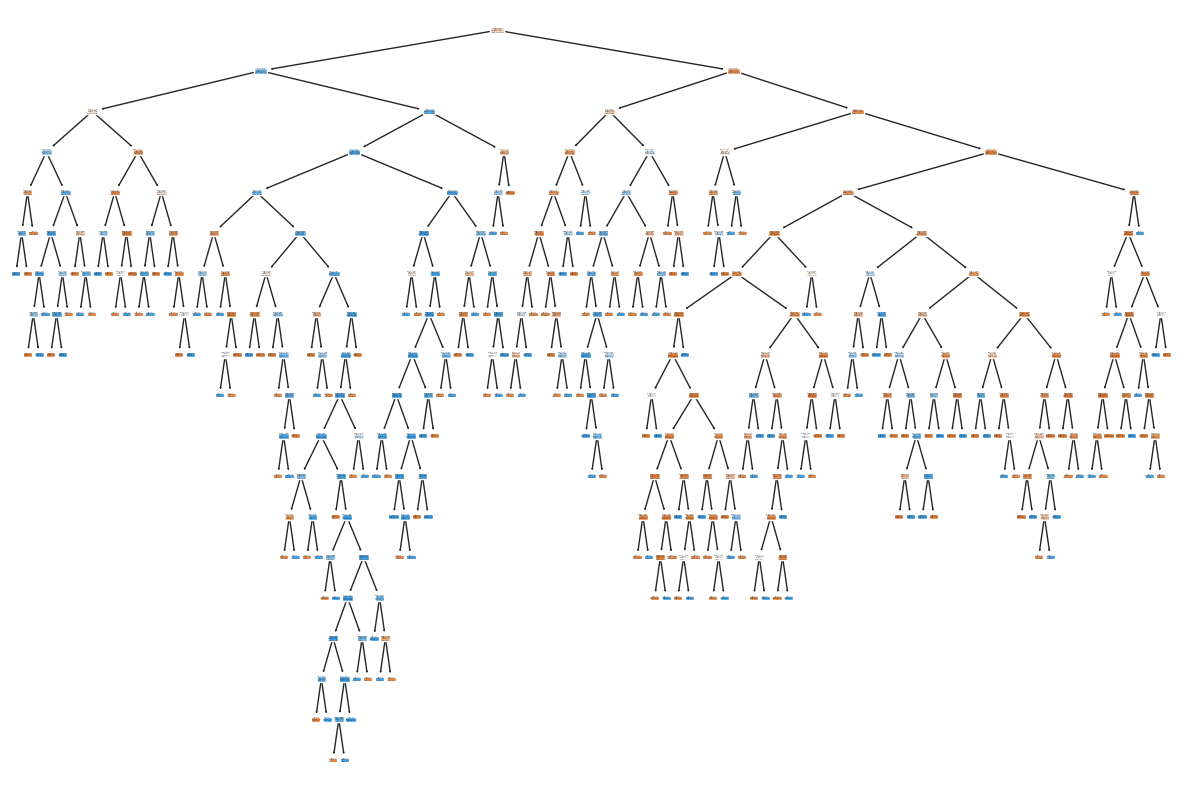

In [71]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

##

In [72]:
dt_probs = clf.predict_proba(X_test_pca)[:,1]

In [73]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_pca,dt_probs)

In [74]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8706889506374632

## Plotting ROC curve

In [75]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

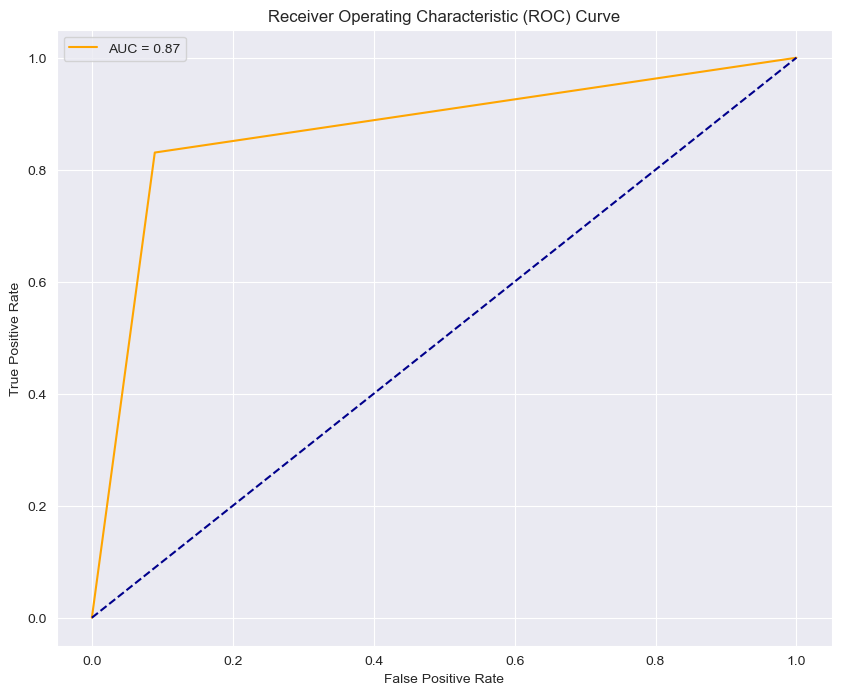

In [76]:
plot_roc_curve(fpr_dt,tpr_dt)

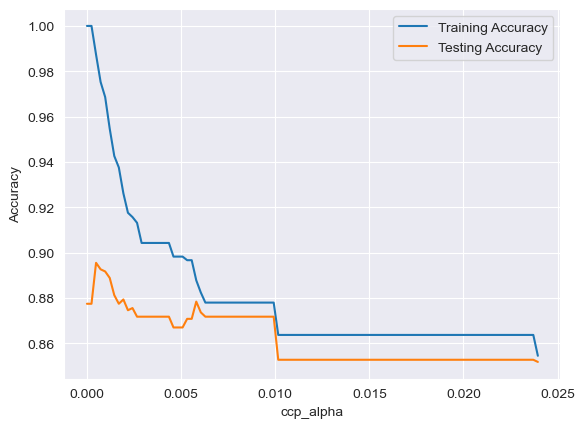

Best ccp_alpha: 0.00029925362624982406


In [77]:
# Calculate the effective alphas using cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train_pca, y_train_pca)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of candidate ccp_alphas to evaluate
ccp_alphas = ccp_alphas[:-1]  # Remove the last alpha, which corresponds to the unpruned tree
candidate_alphas = np.linspace(ccp_alphas[0], ccp_alphas[-1], num=100)

# Train decision trees with increasing ccp_alpha values and evaluate their accuracy
train_accs = []
test_accs = []
for alpha in candidate_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train_pca, y_train_pca)
    train_acc = clf.score(X_train_pca, y_train_pca)
    test_acc = clf.score(X_test_pca, y_test_pca)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plot the training and validation accuracy for each ccp_alpha value
plt.plot(candidate_alphas, train_accs, label="Training Accuracy")
plt.plot(candidate_alphas, test_accs, label="Testing Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Find the ccp_alpha value that maximizes the validation accuracy
# best_alpha = candidate_alphas[np.argmax(val_accs)]
# print(f"\nBest ccp_alpha: {best_alpha:.3f}"
# Find the best ccp_alpha value that maximizes the testing accuracy
best_ccp_alpha = ccp_alphas[np.argmax(test_accs)]
print("Best ccp_alpha:", best_ccp_alpha)

In [78]:
path = clf.cost_complexity_pruning_path(X_train_pca, y_train_pca)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

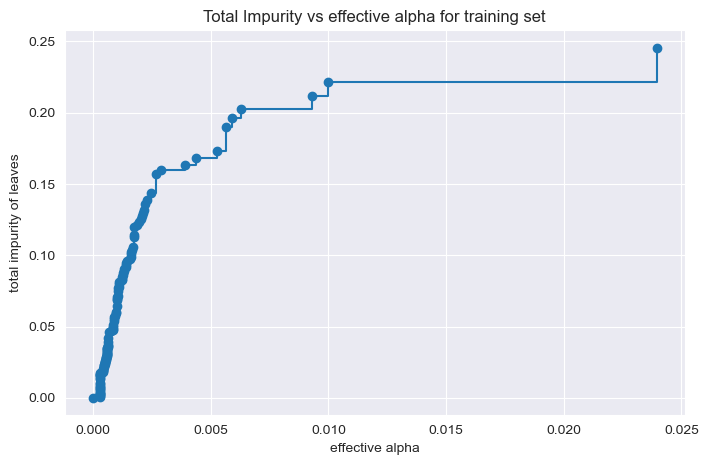

In [79]:
# Visualizing alpha w.r.t impurity of leaves
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_pca, y_train_pca)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23163004645362895


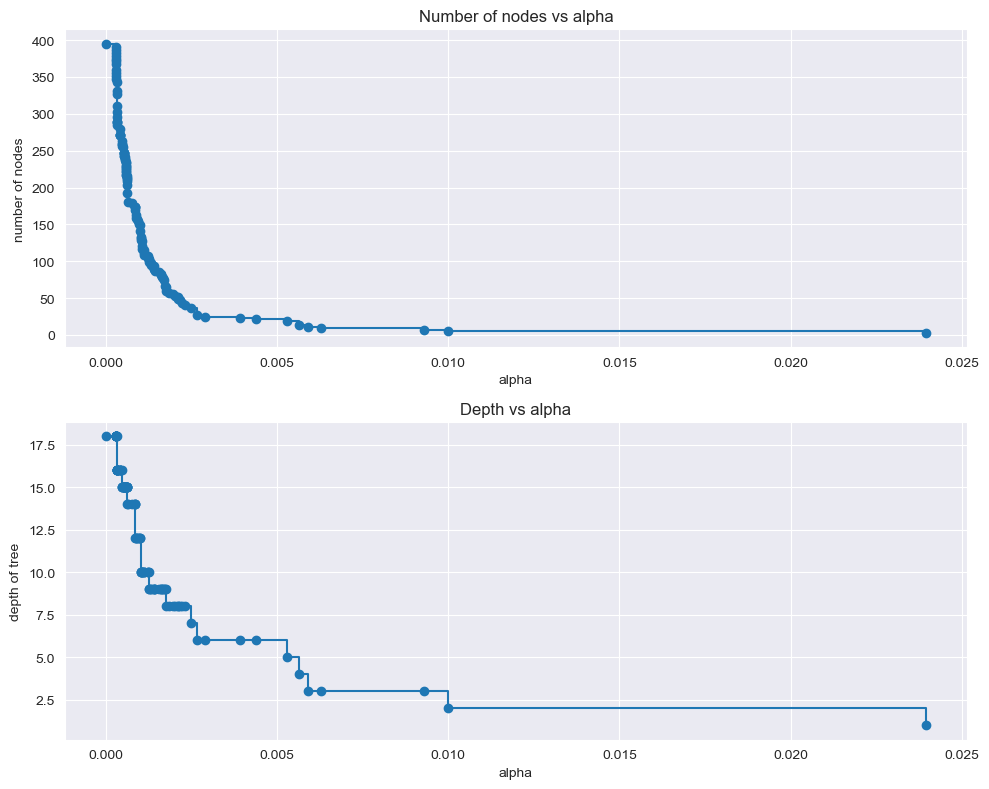

In [81]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

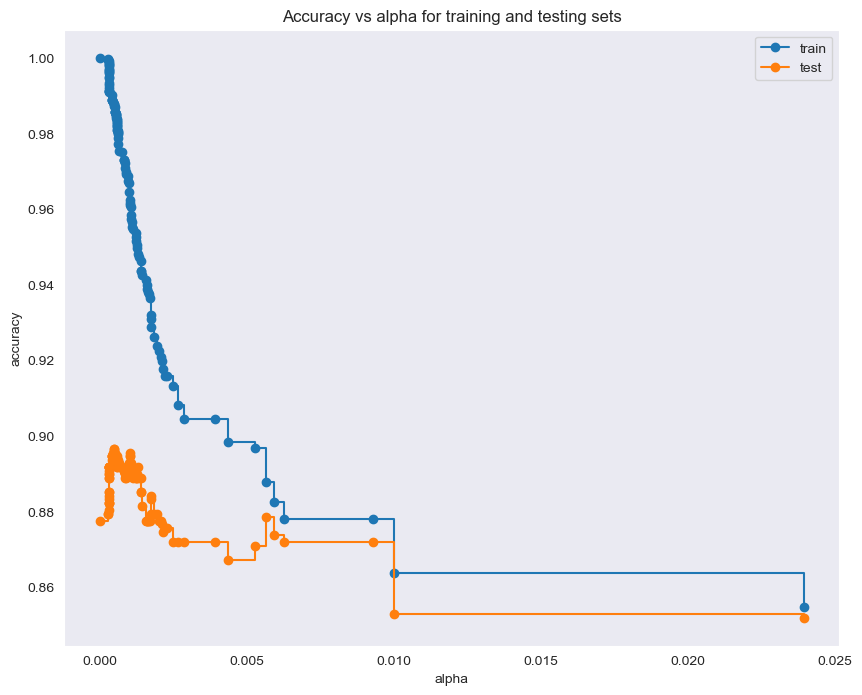

In [82]:
train_scores = [clf.score(X_train_pca, y_train_pca) for clf in clfs]
test_scores = [clf.score(X_test_pca, y_test_pca) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [83]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.007)
clf.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(ccp_alpha=0.007, random_state=0)

In [84]:
pred=clf.predict(X_test_pca)
accuracy_score(y_test_pca, pred)

0.8717948717948718

In [85]:
pred_1 = clf.predict(X_train_pca)
accuracy_score(y_train_pca,pred_1)

0.8780101394169835

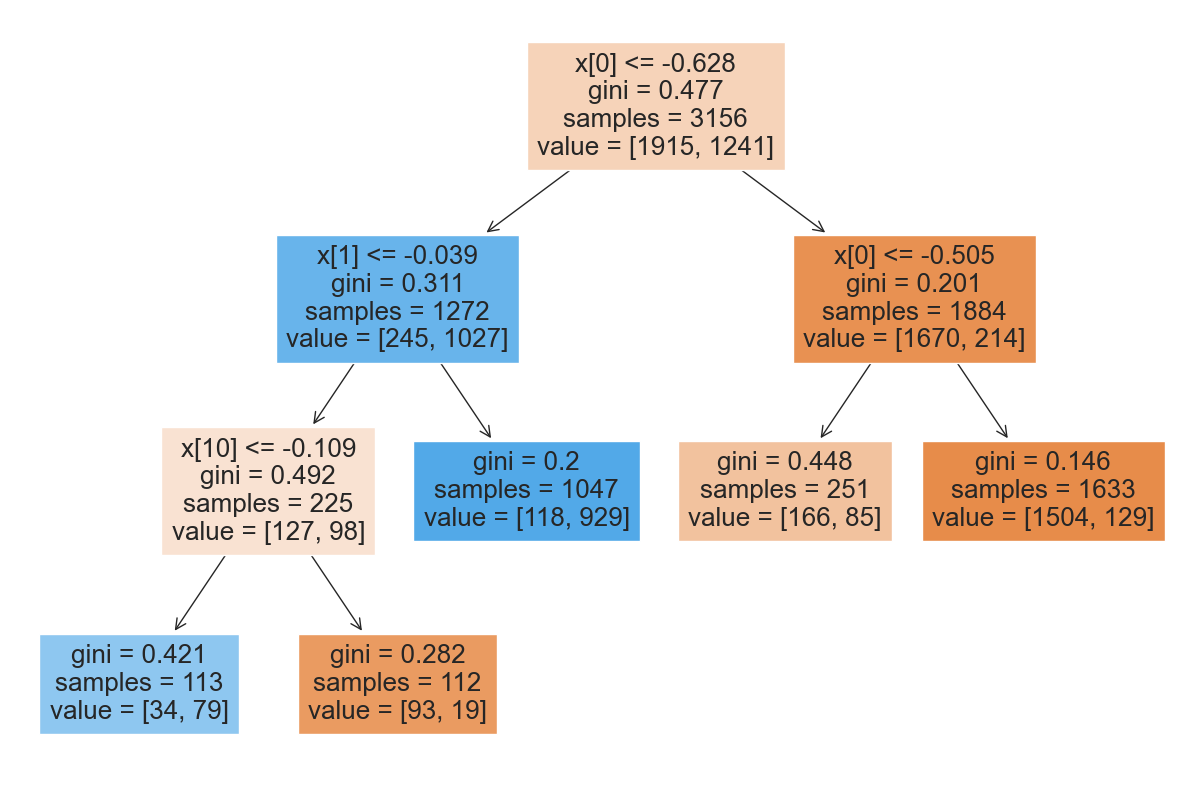

In [86]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()